In [35]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

sys.path.append('.')
warnings.simplefilter("ignore", FutureWarning)
from imputer import Imputer

df = pd.read_csv('./data/PRSA_Data_Changping_20130301-20170228.csv')
i = Imputer(df, independent='PM10', features=['O3', 'TEMP', 'DEWP', 'WSPM', 'NO2', 'SO2'], neighbors=8)

2024-11-06 08:59:45 [WARNING]: hit_rate=68.08541666666667 > 1
2024-11-06 08:59:46 [INFO]: No given device, using default device: cpu
2024-11-06 08:59:46 [WARNING]: ‼️ saving_path not given. Model files and tensorboard file will not be saved.


range(570, 603)


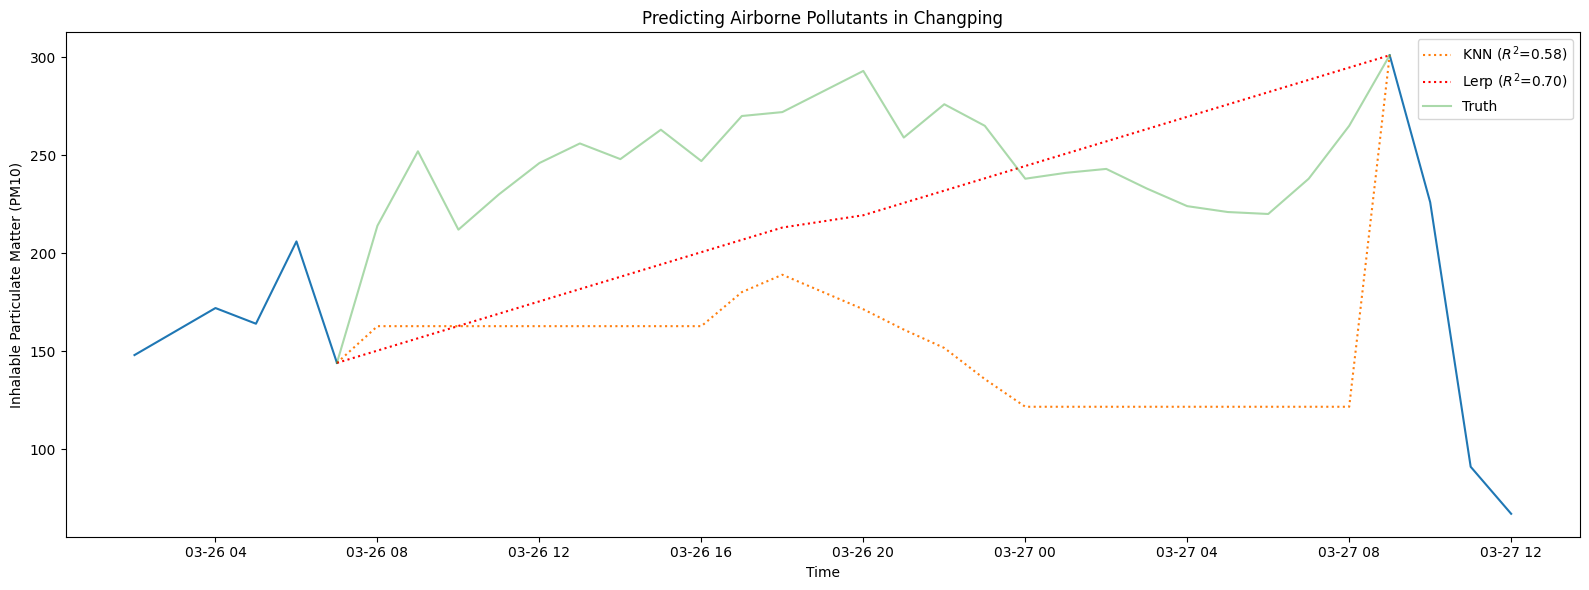

In [38]:
null_indices = range(i.null_indices[24]-1, i.null_indices[47]+2)
masked_indices = range(i.null_indices[24]-5, i.null_indices[47]+5)
print(masked_indices)
truth = i.data['PM10'].iloc[null_indices]
knn = i.knn_predictions_df['PM10'].iloc[null_indices]
lerp = i.lerp_predictions_df['PM10'].iloc[null_indices]

plt.figure(figsize=(16, 6))
plt.plot(i.masked_data_df['PM10'].iloc[masked_indices])
plt.plot(knn, linestyle=':', label=f'KNN ($R^2$={i.knn_r_score():.2f})')
plt.plot(lerp, linestyle=':', color='r', label=f'Lerp ($R^2$={i.lerp_r_score():.2f})')
plt.plot(truth, alpha=0.4, label="Truth")
plt.title("Predicting Airborne Pollutants in Changping")
plt.xlabel("Time")
plt.ylabel("Inhalable Particulate Matter (PM10)")
plt.legend()
plt.tight_layout()
plt.show()